# Sentiment Analysis for product rating



Importing the necessary Libraries to implement Sentiment Analysis

In [1]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Importing pandas to read CSV file (Dataset) from the computer.

Also the display size of the text in the table is increased using 'set_option('display.max_colwidth',200)' in pandas library

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth',200)
df=pd.read_csv(r"C:\Users\Dell\Desktop\Womens Clothing E-Commerce Reviews.csv",encoding='UTF-8',sep=',')

df.drop(['id','title'],axis='columns',inplace=True)
df.head()

,reviews,rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


# Preprocessing
The columns in Dataframe are converted into integer and string datatype.
also the text in the review column are converted into lower cases because our model can predict the word 'THE' an 'the' as different entites


In [3]:
df.reviews = df.reviews.astype(str) 
df.rating = df.rating.astype(int) 
df.reviews = df.reviews.apply(lambda x: x.lower())
df.head()

,reviews,rating
0,absolutely wonderful - silky and sexy and comfortable,4
1,"love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5
2,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3
3,"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


In [4]:
df['char_length'] = df['reviews'].apply(lambda x: len(str(x)))

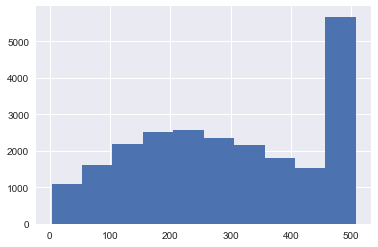

In [5]:
sns.set()
df['char_length'].hist()
plt.show()


Using Regular Expression for correcting the word so that word redundancy can reduced

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [7]:
df['reviews'] = df['reviews'].apply(lambda com : clean_text(com))

In [8]:
df.head()

,reviews,rating,char_length
0,absolutely wonderful silky and sexy and comfortable,4,53
1,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,5,303
2,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,3,500
3,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,5,124
4,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,192


# Removing Punctuation 

In [9]:
import string
def remove_punctuations(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    return txt

In [10]:
df['new_column'] = df['reviews'].apply(remove_punctuations)
df.head()

,reviews,rating,char_length,new_column
0,absolutely wonderful silky and sexy and comfortable,4,53,absolutely wonderful silky and sexy and comfortable
1,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,5,303,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...
2,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,3,500,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
3,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,5,124,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments
4,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,192,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt


# Removing Number 
Because the Number will not that helpul to reflect the sentiment / emotion 

In [11]:
df['new_cloumns'] = df['new_column'].str.replace('\d+', 'number') # to replace no. by ""
df.head()

,reviews,rating,char_length,new_column,new_cloumns
0,absolutely wonderful silky and sexy and comfortable,4,53,absolutely wonderful silky and sexy and comfortable,absolutely wonderful silky and sexy and comfortable
1,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,5,303,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am number number i love the length on...
2,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,3,500,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
3,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,5,124,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments
4,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,192,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt


# Tokenization
we have to iterate through each and every word in the sentence of the dataset 

In [12]:
import re

def tokenize(txt):
    tokens = re.split('\W+' , txt)
    return tokens
df['tokenize']=df['new_cloumns'].apply(lambda x: tokenize(x.lower()))
df.head()

,reviews,rating,char_length,new_column,new_cloumns,tokenize
0,absolutely wonderful silky and sexy and comfortable,4,53,absolutely wonderful silky and sexy and comfortable,absolutely wonderful silky and sexy and comfortable,"[absolutely, wonderful, silky, and, sexy, and, comfortable]"
1,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,5,303,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am number number i love the length on...,"[love, this, dress, it, sooo, pretty, i, happened, to, find, it, in, a, store, and, i, am, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, it, petite, i, bought, a, petite, and, ..."
2,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,3,500,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,"[i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, initially, ordered, the, petite, small, my, usual, size, but, i, found, this, to, be, outrageously, sma..."
3,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,5,124,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,"[i, love, love, love, this, jumpsuit, it, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]"
4,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,192,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,"[this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pairs, well, with, any, ..."


# Removing Stopword 

In [13]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
df['sw']=df['tokenize'].apply(lambda x: remove_stopwords(x))

# Lemattization
Finds root word of the similar words which helps to reduce the computation of our model

In [15]:
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()

In [16]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    
    return text

df['lemmatize']= df['sw'].apply(lambda x : lemmatization(x))
df.head()

,reviews,rating,char_length,new_column,new_cloumns,tokenize,sw,lemmatize
0,absolutely wonderful silky and sexy and comfortable,4,53,absolutely wonderful silky and sexy and comfortable,absolutely wonderful silky and sexy and comfortable,"[absolutely, wonderful, silky, and, sexy, and, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,5,303,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am 5 8 i love the length on me hits j...,love this dress it sooo pretty i happened to find it in a store and i am glad i did bc i never would have ordered it online bc it petite i bought a petite and am number number i love the length on...,"[love, this, dress, it, sooo, pretty, i, happened, to, find, it, in, a, store, and, i, am, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, it, petite, i, bought, a, petite, and, ...","[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, number, number, love, length, hits, little, knee, would, definitely, true, m...","[love, dress, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, number, number, love, length, hit, little, knee, would, definitely, true, mi..."
2,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,3,500,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...,"[i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, initially, ordered, the, petite, small, my, usual, size, but, i, found, this, to, be, outrageously, sma...","[high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, c...","[high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, co..."
3,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,5,124,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,i love love love this jumpsuit it fun flirty and fabulous every time i wear it i get nothing but great compliments,"[i, love, love, love, this, jumpsuit, it, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]"
4,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,192,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,this shirt is very flattering to all due to the adjustable front tie it is the p

# Finding NA values in our huge dataset
we find those ones and fill them with the average value in the dataset i.e. rating 

In [17]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [18]:
df.isna().sum()

reviews        0
rating         0
char_length    0
new_column     0
new_cloumns    0
tokenize       0
sw             0
lemmatize      0
dtype: int64

In [19]:
df.info() #provides info of null fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 8 columns):
reviews        23486 non-null object
rating         23486 non-null int32
char_length    23486 non-null int64
new_column     23486 non-null object
new_cloumns    23486 non-null object
tokenize       23486 non-null object
sw             23486 non-null object
lemmatize      23486 non-null object
dtypes: int32(1), int64(1), object(6)
memory usage: 1.3+ MB


In [20]:
df.rating = df.rating.fillna(df.rating.mean())

In [21]:
df.isna().sum()

reviews        0
rating         0
char_length    0
new_column     0
new_cloumns    0
tokenize       0
sw             0
lemmatize      0
dtype: int64

# Splitting Dataset for Training and Testing 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.lemmatize,df.rating,test_size=0.2,random_state=1)

In [23]:
len(X_test)

4698

In [24]:
print(X_train)

17668    [wow, huge, tent, look, right, style, absurd, could, fit, two, width, peplum, style, extra, width, flatter, anyone, fabric, also, thin, hang, nicely, kind, float, around, body, want, wide, top, pe...
5824                                  [softest, denim, feel, like, wash, hundred, time, already, pleased, belt, removable, add, bit, much, bulk, number, number, bought, petite, perfect, fit, become, go, pair]
10122    [saw, store, purchased, right, spot, even, see, review, wear, either, small, x, small, retailer, top, x, small, better, fit, draped, nicely, still, loose, number, number, number, lb, numberb, worr...
8894            [skirt, beautiful, sizing, kind, usually, wear, number, number, number, number, lb, ordered, number, though, since, sometimes, athropologie, clothes, run, small, even, number, tight, exchange]
22124                                                                                                                                                               

# Feature Extraction
generating matrix value of text Dataset using Countvectorizer then converting them into TFIDF (term frequency–inverse document frequency) 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = lemmatization)

training_data = cv.fit_transform(X_train)
training_data_toarray= training_data.toarray()
print(training_data_toarray)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
Xtrain_tfidf = tfidf_transformer.fit_transform(training_data)

In [27]:
Xtrain_tfidf.shape

(18788, 11077)

In [28]:
# print(Xtrain_tfidf.toarray())

# Implementing the Naive Bayes model and fitting the taining dataset 

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(Xtrain_tfidf, y_train)


# Testing the model

In [30]:
X_test_tf = cv.transform(X_test)
X_test_tfidf=tfidf_transformer.transform(X_test_tf)
predicted= clf.predict(X_test_tfidf)

In [31]:
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# target_names = ['1' , '2', '3', '4', '5']
# print("Accuracy:", accuracy_score(y_test, predicted))
# print(metrics.classification_report((y_test, predicted, target_names= y_test.target_names)),metrics.confusion_matrix(y_train, predicted))

# Precision
# Confusion matrix

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted)) #target nameko list banaune then yo code ma tagetnames= targetname list garne
# print(metrics.confusion_matrix((y_test, predicted))


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       185
          2       0.00      0.00      0.00       299
          3       0.36      0.01      0.03       601
          4       0.28      0.01      0.02      1027
          5       0.56      1.00      0.72      2586

avg / total       0.41      0.55      0.40      4698



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
print(metrics.confusion_matrix(y_test, predicted))

[[   0    0    9    7  169]
 [   0    0    6    7  286]
 [   0    0    9   13  579]
 [   0    0    1   11 1015]
 [   0    0    0    1 2585]]


# Implementing the Naive Bayes model and fitting the taining dataset

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain_tfidf, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
predict = svc.predict(X_test_tfidf)

# Precision And COnfusion Matrix

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       185
          2       0.00      0.00      0.00       299
          3       0.00      0.00      0.00       601
          4       0.00      0.00      0.00      1027
          5       0.55      1.00      0.71      2586

avg / total       0.30      0.55      0.39      4698



C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Testing the external input

In [37]:
# doc = ['This product so far has not disappointed', 'electronics product are bad']
# doc_counts = cv.transform(doc)
# doc_tfidf=tfidf_transformer.transform(doc_counts)
# predicted= clf.predict(doc_tfidf)


In [38]:
# for x in predicted:
#     print(x)

5
4


How it worked ?
Dataframe class provides a constructor to create Dataframe object by passing column names , index names & data in argument like this,
def __init__(self, data=None, index=None, columns=None, dtype=None,

In [39]:
import pandas as pd
dfObj = pd.DataFrame(columns=['User_ID', 'UserName', 'Action'])
print("Empty Dataframe ", dfObj, sep='\n')


Empty Dataframe 
Empty DataFrame
Columns: [User_ID, UserName, Action]
Index: []


In [40]:
dfObj.head()

,User_ID,UserName,Action


In [41]:
dfObj = dfObj.append({'User_ID': 23, 'UserName': 'Riti', 'Action': 'Login'}, ignore_index=True)

In [42]:
dfObj.head()

,User_ID,UserName,Action
0,23,Riti,Login


In [43]:
Doc = pd.DataFrame(columns=['testing'])

In [44]:
Doc = Doc.append({'testing':'Absolutely wonderful - silky and sexy and comfortable' }, ignore_index=True)

In [45]:
Doc = Doc.append({'testing':'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c' }, ignore_index=True)

In [46]:
Doc.head()

,testing
0,Absolutely wonderful - silky and sexy and comfortable
1,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...


In [47]:
Doc.testing = Doc.testing.astype(str) 
 
Doc.testing = Doc.testing.apply(lambda x: x.lower())
Doc.head()

,testing
0,absolutely wonderful - silky and sexy and comfortable
1,i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...


In [48]:
import string
def remove_punctuations(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    return txt



In [49]:
Doc['testing'] = Doc['testing'].apply(remove_punctuations)
Doc.head()

,testing
0,absolutely wonderful silky and sexy and comfortable
1,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...


In [50]:
import re

def tokenize(txt):
    tokens = re.split('\W+' , txt)
    return tokens
Doc['testing']=Doc['testing'].apply(lambda x: tokenize(x.lower()))
Doc.head()

,testing
0,"[absolutely, wonderful, silky, and, sexy, and, comfortable]"
1,"[i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, initially, ordered, the, petite, small, my, usual, size, but, i, found, this, to, be, outrageously, sma..."


In [51]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [52]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
Doc['testing']=Doc['testing'].apply(lambda x: remove_stopwords(x))
Doc.head()

,testing
0,"[absolutely, wonderful, silky, sexy, comfortable]"
1,"[high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, c..."


In [53]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

Doc['testing']= Doc['testing'].apply(lambda x : lemmatization(x))
Doc.head()

,testing
0,"[absolutely, wonderful, silky, sexy, comfortable]"
1,"[high, hope, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, top, half, co..."


In [54]:
doc_counts = cv.transform(Doc.testing)
doc_tfidf=tfidf_transformer.transform(doc_counts)
predicted= clf.predict(doc_tfidf)


In [55]:
for x in predicted:
    print(x)

5
5
